In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', None)

dataset = pd.read_csv('/Users/nic/Documents/学校论文/代码/datasets/UCI_Credit_Card.csv')
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


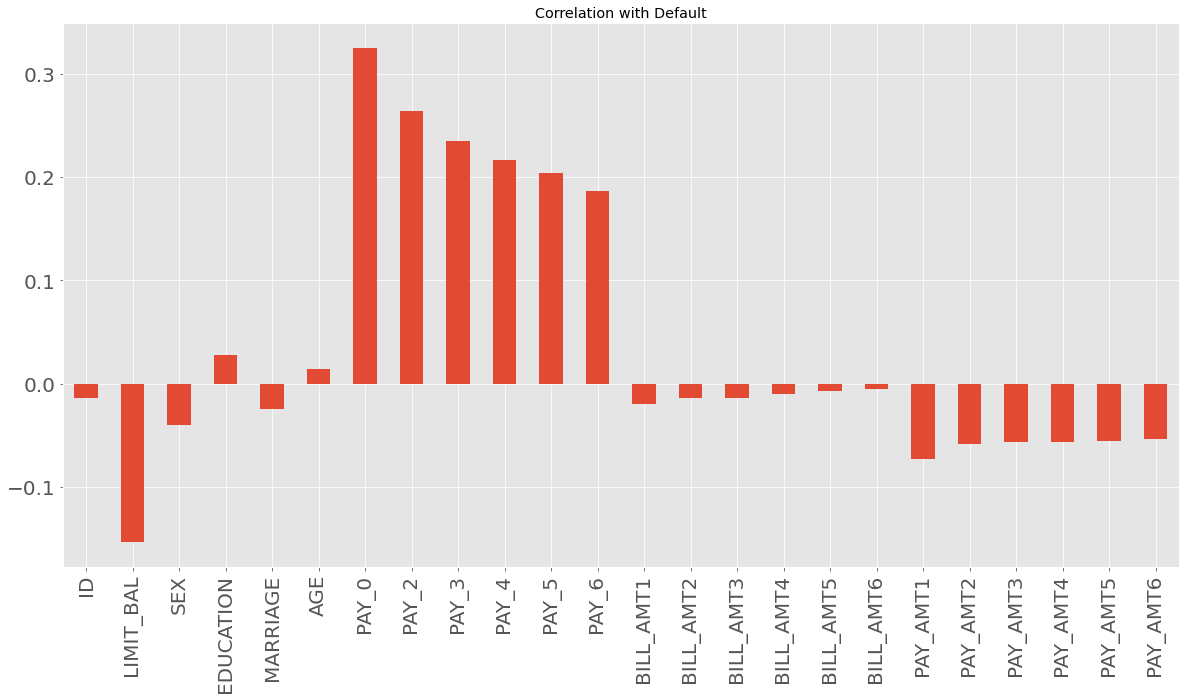

In [4]:
X = dataset.drop(['default.payment.next.month'],axis=1)
y = dataset['default.payment.next.month']
X.corrwith(dataset['default.payment.next.month']).plot.bar(
        figsize = (20, 10), title = "Correlation with Default", fontsize = 20,
        rot = 90, grid = True)

In [40]:
X = X[['PAY_0', 'BILL_AMT1', 'PAY_AMT2']]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [43]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [44]:
from sklearn.ensemble  import AdaBoostClassifier
from time import time
adaboost =AdaBoostClassifier()

start = time()
adaboost.fit(X_train_scaled, y_train)
end = time()
train_time_ada=end-start
train_time_ada

0.44793272018432617

In [45]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
y_pred = adaboost.predict(X_test_scaled)

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Adaboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Adaboost,0.786333,0.741935,0.017733,0.034639,0.508016


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.metrics import classification_report

param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

LR = LogisticRegression(C=0.00005, random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(classification_report(y_test, y_pred))


Accuracy: 0.7838333333333334
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4703
           1       0.00      0.00      0.00      1297

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



/Library/Python/3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Create the random grid
from sklearn.ensemble import RandomForestClassifier
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 50, 'max_features': 3, 'max_depth': 2, 'criterion': 'gini'}


In [56]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 2, 
                                     max_features= 3, n_estimators= 50, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(classification_report(y_test, y_pred))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))


Accuracy: 0.8286666666666667
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4703
           1       0.73      0.33      0.45      1297

    accuracy                           0.83      6000
   macro avg       0.79      0.65      0.67      6000
weighted avg       0.82      0.83      0.80      6000

Average 5-Fold CV Score: 0.8201 , Standard deviation: 0.0084


In [57]:
X_train.shape

(24000, 3)

In [59]:
dataset.shape

(30000, 25)

In [61]:
X_train[:5]

,PAY_0,BILL_AMT1,PAY_AMT2
3225,0.2,0.161646,0.000000
11815,0.1,0.146665,0.000163
7338,0.4,0.164450,0.000891
14980,0.4,0.171494,0.000089
27167,0.2,0.153842,0.001187


In [62]:
import tensorflow as tf
%matplotlib inline
from keras.layers import Input, Dense, LSTM
from keras.models import Model

from keras.layers import *
from keras.models import *
from keras.optimizers import Adam


(24000, 3) (24000,) (6000, 3) (6000,)


Using TensorFlow backend.


In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

output_dim = 1
batch_size = 256 #每轮训练模型时，样本的数量
epochs = 60 #训练60轮次
seq_len = 6 # 每3个为一组时间窗口
hidden_size = 128

TIME_STEPS = 6
INPUT_DIM = 3

lstm_units = 64
dataset_flow = dataset[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                        'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                        'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
scaler.fit(dataset_flow)
X_train, X_test, y_train, y_test = train_test_split(dataset_flow, y, test_size = 0.2, random_state = 1)
# 归一化
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
train_num = X_train.shape[0]
test_num = X_test.shape[0]
X_train = X_train.reshape((train_num, seq_len, 3))
y_train = y_train.values
X_test = X_test.reshape((test_num, seq_len, 3))
y_test = y_test.values
# X_train = np.array([data_train[i : i + seq_len, :] for i in range(data_train.shape[0] - seq_len)])
# y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0]- seq_len)])
# X_test = np.array([data_test[i : i + seq_len, :] for i in range(data_test.shape[0]- seq_len)])
# y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24000, 6, 3) (24000,) (6000, 6, 3) (6000,)


In [114]:
inputs = Input(shape=(TIME_STEPS, INPUT_DIM))
#drop1 = Dropout(0.3)(inputs)

x = Conv1D(filters = 64, kernel_size = 1, activation = 'relu')(inputs)  #, padding = 'same'
#x = Conv1D(filters=128, kernel_size=5, activation='relu')(output1)#embedded_sequences
x = MaxPooling1D(pool_size = 5)(x)
x = Dropout(0.2)(x)
print(x.shape)

(None, 1, 64)


In [115]:
lstm_out = Bidirectional(LSTM(lstm_units, activation='relu'), name='bilstm')(x)
#lstm_out = LSTM(lstm_units,activation='relu')(x)
print(lstm_out.shape)

(None, 128)


In [116]:
from keras import backend as K
from keras.engine.topology import Layer
import numpy as np
from keras import initializers
# Attention GRU network  未用     
class AttLayer(Layer):
    def __init__(self, **kwargs):
        self.init = initializers.get('normal')
        #self.input_spec = [InputSpec(ndim=3)]
        super(AttLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape)==128
        #self.W = self.init((input_shape[-1],1))
        self.W = self.init((input_shape[-1],))
        #self.input_spec = [InputSpec(shape=input_shape)]
        self.trainable_weights = [self.W]
        super(AttLayer, self).build(input_shape)  # be sure you call this somewhere!

    def call(self, x, mask=None):
        eij = K.tanh(K.dot(x, self.W))
        
        ai = K.exp(eij)
        weights = ai/K.sum(ai, axis=1).dimshuffle(0,'x')
        
        weighted_input = x*weights.dimshuffle(0,1,'x')
        return weighted_input.sum(axis=1)

    def get_output_shape_for(self, input_shape):
        return (input_shape[0], input_shape[-1])
    
# l_att = AttLayer()(lstm_out)
# output = Dense(1, activation='sigmoid')(l_att)
# print(output.shape)

In [117]:
from keras.layers import Input, Dense, merge
from keras import layers
# ATTENTION PART STARTS HERE
attention_probs = Dense(128, activation='sigmoid', name='attention_vec')(lstm_out)
#attention_mul=layers.merge([stm_out,attention_probs], output_shape],mode='concat',concat_axis=1))
attention_mul =Multiply()([lstm_out, attention_probs])
#attention_mul = merge([lstm_out, attention_probs],output_shape=32, name='attention_mul', mode='mul')

In [118]:
output = Dense(1, activation='relu')(attention_mul)
#output = Dense(10, activation='sigmoid')(drop2)

model = Model(inputs=inputs, outputs=output)
print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 6, 3)         0                                            
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 6, 64)        256         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, 1, 64)        0           conv1d_2[0][0]                   
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 1, 64)        0           max_pooling1d_2[0][0]            
____________________________________________________________________________________________

In [145]:

from keras import optimizers
sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=60, batch_size=512, shuffle=False)
y_pred = model.predict(X_test)
print('Train loss:', model.evaluate(X_train, y_train, batch_size=batch_size))
print('Test loss:', model.evaluate(X_test, y_test, batch_size=batch_size))
print('ROC-AUC:', roc_auc_score(y_test, y_pred))
# plt.plot(y_test, label='test')
# plt.plot(y_pred, label='pred')
# plt.legend()
# plt.show()

Epoch 1/60
24000/24000 [==============================] - 1s 55us/step - loss: 0.4425
Epoch 2/60
24000/24000 [==============================] - 0s 16us/step - loss: 0.4423
Epoch 3/60
24000/24000 [==============================] - 0s 15us/step - loss: 0.4425
Epoch 4/60
24000/24000 [==============================] - 0s 15us/step - loss: 0.4432
Epoch 5/60
24000/24000 [==============================] - 0s 16us/step - loss: 0.4420
Epoch 6/60
24000/24000 [==============================] - 0s 15us/step - loss: 0.4425
Epoch 7/60
24000/24000 [==============================] - 0s 15us/step - loss: 0.4428
Epoch 8/60
24000/24000 [==============================] - 0s 15us/step - loss: 0.4427
Epoch 9/60
24000/24000 [==============================] - 0s 17us/step - loss: 0.4425
Epoch 10/60
24000/24000 [==============================] - 0s 18us/step - loss: 0.4423
Epoch 11/60
24000/24000 [==============================] - 0s 18us/step - loss: 0.4422
Epoch 12/60
24000/24000 [===========================

In [154]:
y_pred_flatten = y_pred.flatten()
print(y_test, '\n',y_pred)
print(len([y_p for y_p in y_pred if y_p!=0]))
y_pred_new = [0 if y_p<0.45 else 1 for y_p in y_pred_flatten]
print(classification_report(y_test, y_pred_new))

[0 1 0 ... 0 0 0] 
 [[0.08065483]
 [0.27119496]
 [0.1429239 ]
 ...
 [0.11683801]
 [0.1557403 ]
 [0.12776509]]
5985
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4663
           1       0.59      0.41      0.48      1337

    accuracy                           0.80      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.80      0.79      6000



In [155]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_new)
print(accuracy)

0.8041666666666667
